# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [307]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math as math
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
import scipy as sp
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [308]:
### Functions for fitting and evaluating multiple linear regression
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [309]:
# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, y_pred = multiple_linear_regression_score(w, c, x_test, y_test)

print('R^2 score on test set:', r_squared)
print('Predicted y values:', y_pred)

('R^2 score on test set:', 0.17794462732714034)
('Predicted y values:', array([ 18366.98960972,  10093.91615174,  13185.2111659 ,  13185.2111659 ,
         9823.23150227,  12215.67056209,  13116.01889519,  17000.54868174,
        15338.51949493,  12813.78032705,  13714.12866015,  14608.10962191,
        18927.17808466,   8123.28102545,   8721.39079041,   8721.39079041,
         9319.50055536,  12310.04938014,  12310.04938014,   9520.99293412,
         9520.99293412,   9766.49103625,   3187.28362173,   3539.89528457,
        11315.32222899,  11315.32222899,  11315.32222899,  11315.32222899,
        15363.70604227,  15363.70604227,  14866.3424667 ,  14866.3424667 ,
        14866.3424667 ,  14866.3424667 ,  14866.3424667 ,  14866.3424667 ,
        11869.42627059,  11988.99163598,  13065.6458005 ,  13065.6458005 ,
        13065.6458005 ,  19588.39568697,  19588.39568697,  19462.46295025,
        19462.46295025,   3684.64719731,  11693.12043917,   3684.64719731,
        11693.12043917,  116

### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

Linear regression with all predictors


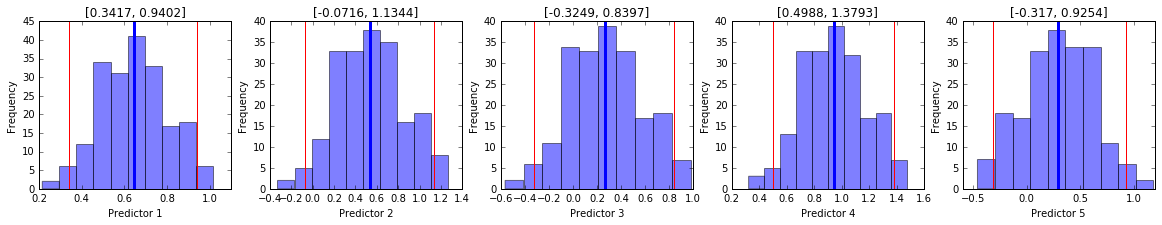

In [310]:
# Load train set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()

From the confidence intervals above, we can see that predictors 1 and 4 have a statistically significant impact on estimating the y outcome. This is because the confidence intervals for predictors 2, 3, and 5 include 0. This means that there is a possibility of having no impact on the predicted y outcome. 

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

In [311]:
dataset3 = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)

# Separate x and y values within dataset
x_values = [[a] for [a,b] in dataset3]
y_values = [[b] for [a,b] in dataset3]

# Use sk_learn library to extrapolate line of best fit from neighbours and r_squared value
x_train1, x_test1, y_train1, y_test1 = sk_split(x_values, y_values, test_size = 0.3)

def polynomial_regression_fit(x_train, y_train, degree):
    
    # Determine length of x_train dataset and create an array with that length and width of degree
    n = len(x_train)
    coefs_multiple = np.ones((n, degree))
    
    # Fill each array value with the correct x_train value raised to the corresponding power
    for each in range(len(x_train)):
        for value in range(degree):
            coefs_multiple[each][value] = math.pow(x_train[each][0], float(value))
    
    # Compute transpose of x
    x_transpose = np.transpose(coefs_multiple)
    
    # Compute intermediate term: inv(x^T * x)
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, coefs_multiple))
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Using sm to determine model results
    model=sm.OLS(y_train,coefs_multiple)
    model_results=model.fit()
    
    return model_results, w

def polynomial_regression_predict(w, degree, x_test):
    
    # Determine length of x_test dataset and create an array with that length and width of degree
    n = len(x_test)
    coefs_multiple = np.ones((n, degree))
    
    # Populate each box in the coefs_multiple array with x_test raised to the corresponding power
    for each in range(len(x_test)):
        for value in range(degree):
            coefs_multiple[each][value] = math.pow(x_test[each][0], float(value))
    
    # Predict y-vals using the w array
    y_pred = np.dot(coefs_multiple, w)
    return y_pred

def polynomial_regression_score(y_pred, y_test):        
    
    # Evaluate sqaured error, against target labels
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared

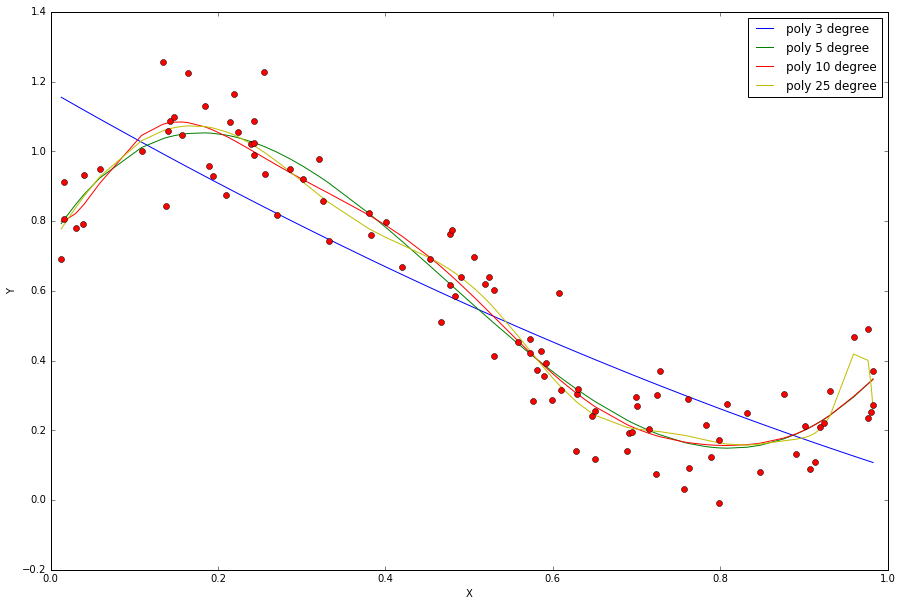

In [312]:
# Read the csv and sort by value of x
dataset3 = pd.read_csv('datasets/dataset_3.txt')
dataset3_sorted = dataset3.sort_values("x")
dataset_np = dataset3_sorted.as_matrix()

# Separate x and y values within dataset
x_values = [[a] for [a,b] in dataset_np]
y_values = [[b] for [a,b] in dataset_np]

# Generated predicted y value using above polynomial regression functions
def plot_graph(degree):
    plt.figure(figsize=(15,10))
    for d in range(1, degree + 1):
        model_results, w = polynomial_regression_fit(x_values, y_values, degree)
        y_hat = polynomial_regression_predict(w, degree, x_values)
    return y_hat

# Generate predicted y values for varying degrees
y_hat_3 = plot_graph(3)
y_hat_5 = plot_graph(5)
y_hat_10 = plot_graph(10)
y_hat_25 = plot_graph(25)

# Plot all on the same graph and label clearly
plt.plot(x_values, y_hat_3, 'b', label='poly 3 degree')
plt.plot(x_values, y_hat_5, 'g', label='poly 5 degree')
plt.plot(x_values, y_hat_10, 'r', label='poly 10 degree')
plt.plot(x_values, y_hat_25, 'y', label='poly 25 degree')
plt.plot(x_values, y_values, 'ro')
plt.xlabel('X'); 
plt.ylabel('Y')
plt.legend(loc='best')
plt.show()

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

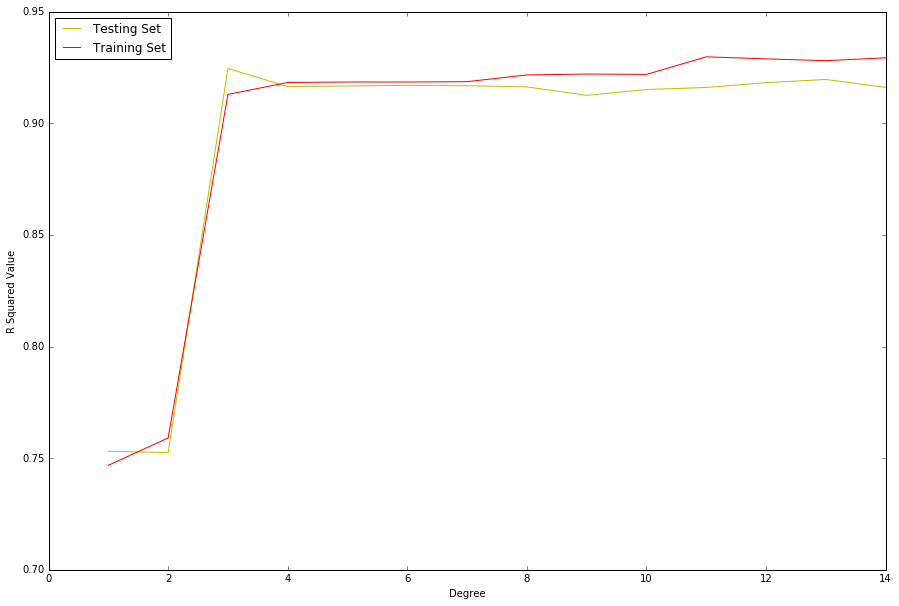

In [313]:
dataset3 = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)

# Separate x and y values within dataset
x_values = [[a] for [a,b] in dataset3]
y_values = [[b] for [a,b] in dataset3]

# Separate testing and training datasets
x_test = x_values[:][50:]
x_train = x_values[:][:50]
y_test = y_values[:][50:]
y_train = y_values[:][:50]

# Determine r_squared values for both testing and training data sets for 15 degrees
test, train = [], []
for i in range(1,15):
    
    # Add 1 to degree to compensate for 0 index (y intercept)
    degree = int(i) + 1
    
    # Run polynomial regression equations on testing data
    model_results, w = polynomial_regression_fit(x_train, y_train, degree)
    y_pred = polynomial_regression_predict(w, degree, x_test)
    r_squared = polynomial_regression_score(y_pred, y_test)
    test.append(r_squared)
    
    # Run polynomial regression equations on training data
    y_pred = polynomial_regression_predict(w, degree, x_train)
    r_squared = polynomial_regression_score(y_pred, y_train)
    train.append(r_squared)

# Plot the figure and label clearly
plt.figure(figsize=(15,10))
plt.plot(range(1,15), test, 'y', label='Testing Set')
plt.plot(range(1,15), train, 'r', label ="Training Set")
plt.xlabel('Degree'); 
plt.ylabel('R Squared Value')
plt.legend(loc='best')
plt.show()

Based on the graph above, the best degree to use would be degree 3. This is recommended because it has the highest training set r squared value and a high training set value. This allows us to accurately predict testing data y values without overfitting the training dataset too closely. 

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

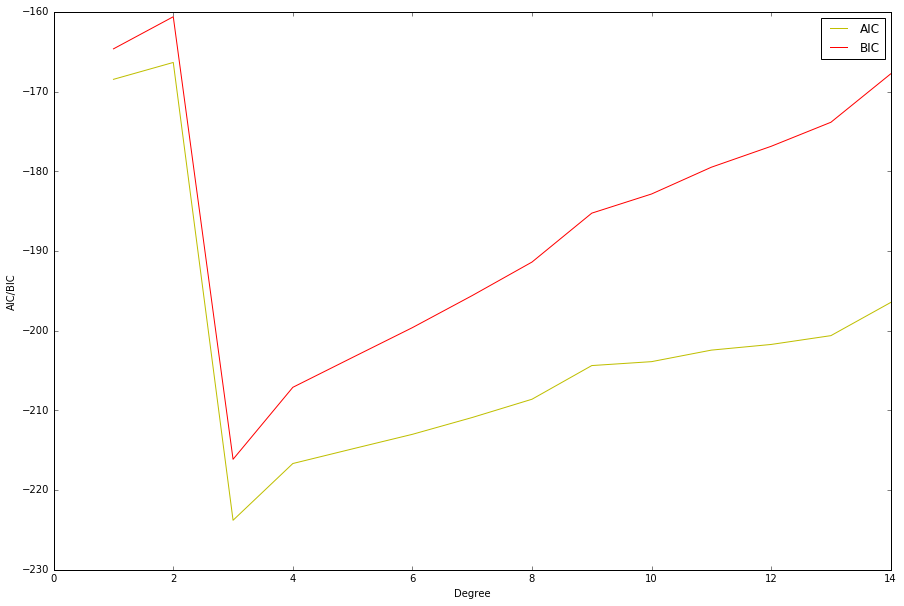

In [314]:
dataset3 = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)

# Separate x and y values within dataset
x_values = [[a] for [a,b] in dataset3]
y_values = [[b] for [a,b] in dataset3]

# x_train1, x_test1, y_train1, y_test1 = sk_split(x_values, y_values, test_size = 0.5)
x_test = x_values[:][50:]
x_train = x_values[:][:50]
y_test = y_values[:][50:]
y_train = y_values[:][:50]

# Determine AIC and BIC for 15 different degrees
AIC, BIC = [], []
for i in range(1,15):
    
    # Add 1 to degree to compensate for 0 index (y intercept)
    degree = int(i) + 1
    
    # Use polynomial regression equations to determine predicted y values and RSS
    model_results, w = polynomial_regression_fit(x_train, y_train, degree)
    y_pred = polynomial_regression_predict(w, degree, x_test)
    RSS = np.sum(np.square(y_test - y_pred))
    n = len(x_test)
    
    # Plug RSS, degree, and length into equations for AIC and BIC values
    AIC.append(n * math.log(RSS / n) + 2 * degree)
    BIC.append(n * math.log(RSS / n) + math.log(n) * degree)

# Plot AIC and BIC for varying degrees and label clearly
plt.figure(figsize=(15,10))
plt.plot(range(1,15), AIC, 'y', label='AIC')
plt.plot(range(1,15), BIC, 'r', label ="BIC")
plt.xlabel('Degree'); 
plt.ylabel('AIC/BIC')
plt.legend(loc='best')
plt.show()

Degree of 3 was choosen by the AIC and BIC models since this degree produces the minimum AIC and BIC values. This matches with the results of maxmizing the r-squared score, which also recommended using a degree of 3.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [320]:
# Read dataset and isolate column of green taxi cab pick up times
dataset_pd = pd.read_csv('green_tripdata_2015-01.csv')
dataset_time = dataset_pd.iloc[:, 1:2]
dataset_np = dataset_time.as_matrix()

# Separate data and time
time, minutes = [], []
for each in range(len(dataset_np)):
    time.append((dataset_np[each][0].split())[1])

# Separate time into hours and minutes and find total number of minutes
for each in range(len(time)): 
    h, m = time[each].split(':')
    minutes.append(int(h) * 60 + int(m))
    
# Create an x array with all possible time values
x_array = np.array(range(23*60 + 59)).reshape((23*60 +59), 1)
x = [[float(b/1440.0)] for b in x_array]

# Create y array by counting the number of y values
y = np.empty([(23*60+59), ])
for each in x_array:
    y[each] = (minutes.count(each))

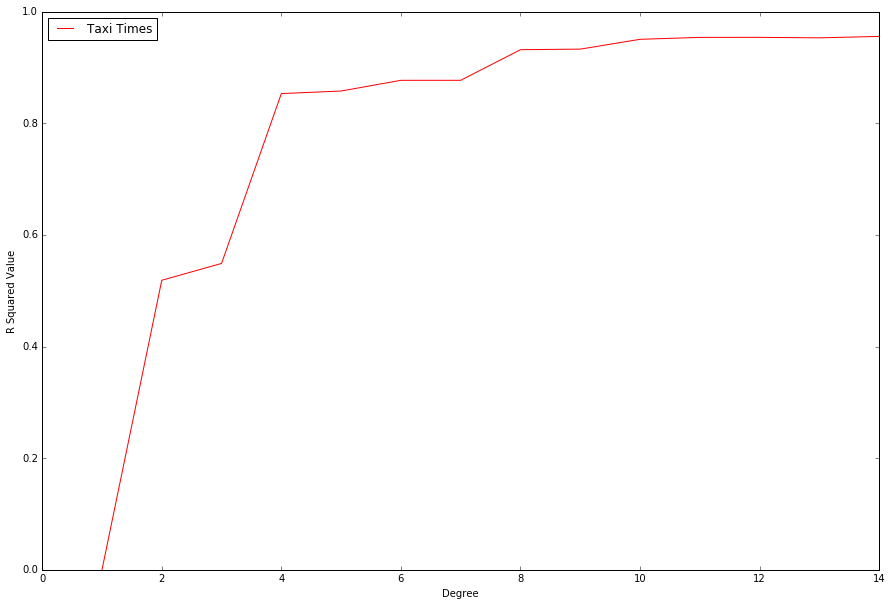

In [321]:
# Calculate r squared values using the polynomial regression equations from above
r_squared_array = []
for i in range(1,15):
    degree = i
    model_results, w = polynomial_regression_fit(x, y, degree)
    y_pred = polynomial_regression_predict(w, degree, x)
    r_squared = polynomial_regression_score(y_pred, y)
    r_squared_array.append(r_squared)
    
# Plot r squared values to find optimal degree
plt.figure(figsize=(15,10))
plt.plot(range(1,15), r_squared_array, 'r', label='Taxi Times')
plt.xlabel('Degree'); 
plt.ylabel('R Squared Value')
plt.legend(loc='best')
plt.show()

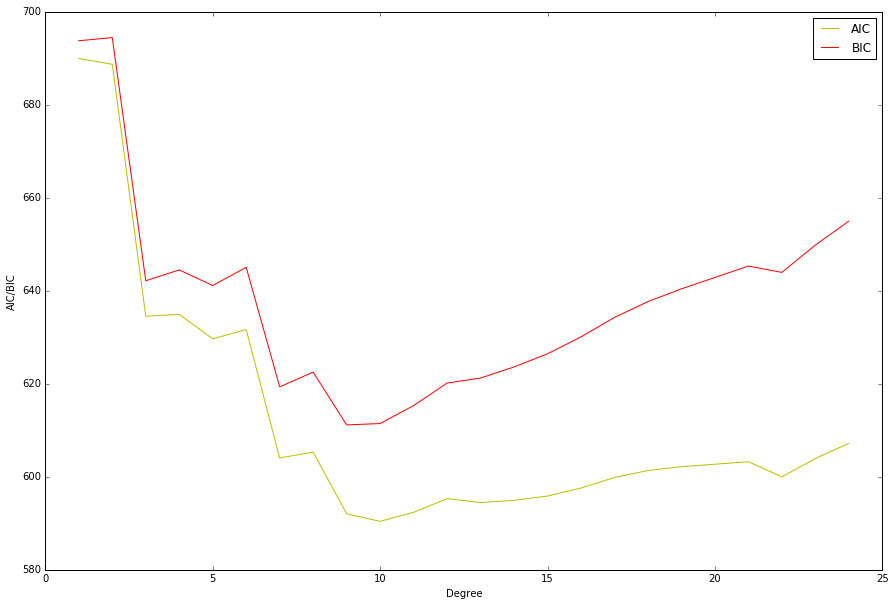

In [322]:
# Determine AIC and BIC for 15 different degrees
AIC, BIC = [], []
for i in range(1,25):
    
    # Add 1 to degree to compensate for 0 index (y intercept)
    degree = int(i) + 1
    
    # Use polynomial regression equations to determine predicted y values and RSS
    model_results, w = polynomial_regression_fit(x, y, degree)
    y_pred = polynomial_regression_predict(w, degree, x)
    RSS = np.sum(np.square(y - y_pred))
    n = len(x_test)
    
    # Plug RSS, degree, and length into equations for AIC and BIC values
    AIC.append(n * math.log(RSS / n) + 2 * degree)
    BIC.append(n * math.log(RSS/n) + math.log(n) * degree)

# Plot AIC and BIC for varying degrees and label clearly
plt.figure(figsize=(15,10))
plt.plot(range(1,25), AIC, 'y', label='AIC')
plt.plot(range(1,25), BIC, 'r', label ="BIC")
plt.xlabel('Degree'); 
plt.ylabel('AIC/BIC')
plt.legend(loc='best')
plt.show()

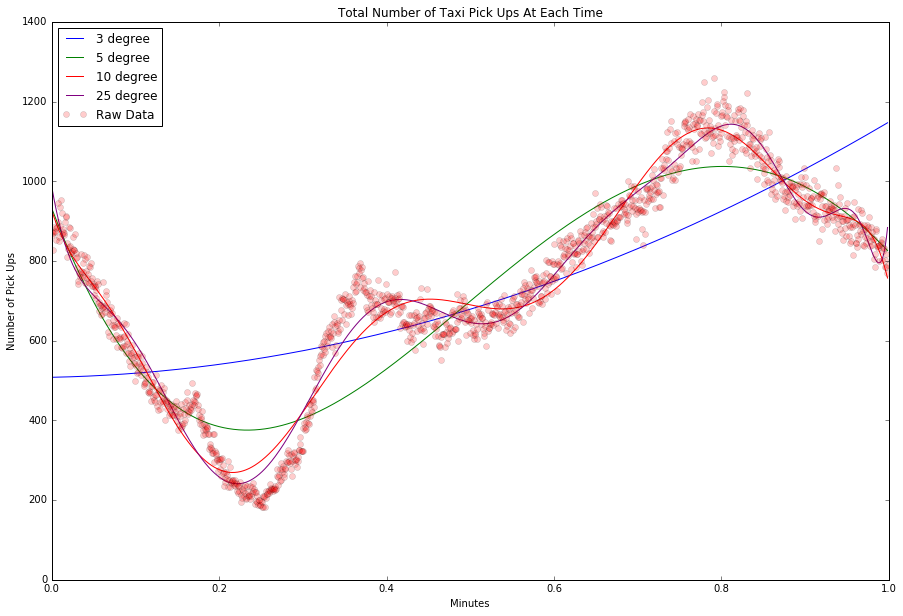

In [323]:
# Create a function that returns y_pred after inputting a degree
def plot_taxi(degree):
    plt.figure(figsize=(15,10))
    for d in range(1, degree + 1):
        model_results, w = polynomial_regression_fit(x, y, degree)
        y_pred = polynomial_regression_predict(w, degree, x)
    return y_pred

# Plots y values for degrees of 3, 5, 10, and 25
y_hat_3 = plot_taxi(3)
y_hat_5 = plot_taxi(5)
y_hat_10 = plot_taxi(10)
y_hat_25 = plot_taxi(25)

# Graph all predicted values on same plot as original data and label clearly
x_values.sort()
plt.plot(x, y_hat_3, 'b', label='3 degree')
plt.plot(x, y_hat_5, 'g', label='5 degree')
plt.plot(x, y_hat_10, 'r', label='10 degree')
plt.plot(x, y_hat_25, 'purple', label='25 degree')
plt.plot(x, y, 'ro', alpha = 0.2, label='Raw Data')
plt.title('Total Number of Taxi Pick Ups At Each Time')
plt.xlabel('Minutes')
plt.ylabel('Number of Pick Ups')
plt.legend(loc='best')

plt.show()

From the r squared graph, which plateus at 10 degrees, the AIC/BIC test, which is minimal around degree of 10, and the above scatterplot comparing the accuracy of the different degrees, it appears that degrees of 10 provides the most accurate fit without overfitting the data. Thus, I set degree = 10 in my function that models the number of taxi pick ups in New York. 

In [324]:
# Create a function that takes in minutes and produces predicted number of pick ups
def predict(minutes):
    degree = 10
    
    # Normalize time by dividing by total number of minutes
    time = [[float(minutes/1440.0)]]
    model_results, w = polynomial_regression_fit(x, y, degree)
    y_pred = polynomial_regression_predict(w, degree, time)
    
    # Return y predicted value, the total number of pick ups
    print y_pred[0]

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?